In [3]:
#Imports of the needed libraries 
import numpy as np 
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sym     #CAS for python
import time
from tqdm import trange

In [4]:
#Define a function that returns the approximate value of the functional
def approximate_functional(x0,x1,y0,y1,n):
    tick=time.time() #Start timing

    dx=(x1-x0)/(n+1)     #Spacing based on the x distances and number of regions selected
    y_values=np.zeros(n+2)
    y_values[0]=y0
    y_values[-1]=y1      #Boundary conditions

    #Generate all the needed yi variables in the expression for F
    i=sym.symbols('i')
    y=sym.symbols('y', cls=sym.Function)    #Define y as an unknown function
    F0=((y(i+1)-y(i))/dx)**2+((y(i+1)+y(i))/2)**2
    F0=np.asarray([F0.subs(i,j) for j in range(1,n)])

    #Need to collapse into one input rather than a list
    F=0
    for ii in range(n-1):
        F+=F0[ii]

    #Now also include the known boundary terms 
    F+=((y(1)-y_values[0])/dx)**2+((y(1)+y_values[0])/2)**2
    F+=((y_values[-1] -y(n))/dx)**2+((y_values[-1] +y(n))/2)**2

    #Define the approximate functional
    I=F*dx 

    #Now differentiate the form of the functional for each y(i) and store the value of y(i) that minimises the functional
    #List to hold each equation after differentiation via each y 
    I_prime=[]
    ys=[]

    for ii in range(1, n+1):
        #Differentiate wrt to each yi
        current=sym.diff(I, y(ii))
        I_prime.append(current)     #Append each new equation to the list
        ys.append(y(ii))        #Keep track of the y variables used for solving later


    #Now solve each equation simultaneously 
    solutions=sym.solve(tuple(I_prime), tuple(ys))

    #Isolate the y values
    for ii in range(1, n+1):
        y_values[ii]=solutions[y(ii)]

    #Non-boundary conditions
    middle_y=np.zeros(n)
    for ii in range(0,n):
        middle_y[ii]=y_values[ii+1]


    #Put each yi back into I to evaulate it numerically
    num_I=sym.lambdify([list(ys)], I, 'numpy')

    #Store the final value approximation of the functional
    final_value=num_I(middle_y)

    tock=time.time()
    time_elapsed=tock-tick
    #Analysis
    return final_value, time_elapsed

In [5]:
# #Analysis for changing values of n from 2 to 100
iterations=100 #Number of total iterations the code will inspect
results=np.zeros((iterations-1,2)) #To store the results of the functional in the first column and the time taken in the second column

x0=0
x1=2
y0=1
y1=2

for jj in trange(2, iterations+1):
    results[jj-2,:]=np.asarray(approximate_functional(x0,x1,y0,y1,jj))
    
print(results)

In [6]:
# #Store the data so this cell doesn't need to be re-run
results=pd.DataFrame(results)
#Create a csv file
results.to_csv('Variational Calculus Project Results.csv', index=False, header=False)

In [7]:
#Find the integral symbollically for comparison to the numerical result
x=sym.Symbol('x')
I=(((2-sym.exp(-2))*sym.cosh(x)/sym.sinh(2) -sym.exp(-x))**2 + ((2-sym.exp(-2))*sym.sinh(x)/sym.sinh(2) + sym.exp(-x))**2)

integral=sym.integrate(I, x)
symbolic_exact_integral=sym.integrate(I, (x,x0,x1))
lam_integral=sym.lambdify(x,integral) #Lambdify for numerical result
exact_value=lam_integral(2) - lam_integral(0)
print('The exact value of the integral is [', symbolic_exact_integral, '] which numerically is approximately equal to:', exact_value)

The exact value of the integral is [ -4/sinh(2) - exp(-4)*cosh(2)/sinh(2) - exp(-4) + 2*exp(-2)/sinh(2) + 1 + 4*cosh(2)/sinh(2) ] which numerically is approximately equal to: 4.083691344550608


In [8]:
#Read in the stored results if the kernel is restarted
results=pd.read_csv('Variational Calculus Project Results.csv')
results=results.rename(columns={"4.142857142857145": "Result", "0.18986892700195312": "Time"})
appendix=pd.DataFrame({'Result':[4.142857142857145], 'Time':[0.18986892700195312]})
results=pd.concat([appendix, results])

<IPython.core.display.Javascript object>


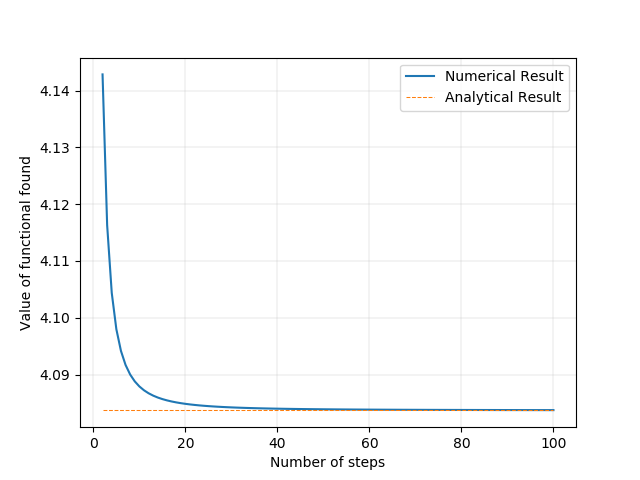

Text(0, 0.5, 'Value of functional found')

In [20]:
#Data visualisation
#General plot of value against n 
n_values=np.arange(2, iterations+1, 1)
exact_value_array=np.full(iterations-1, exact_value)
plt.plot(n_values, results['Result'], label='Numerical Result')
plt.plot(n_values, exact_value_array, linestyle='--', linewidth=0.75, label='Analytical Result')
plt.legend()
plt.grid(linewidth=0.2)
plt.xlabel('Number of steps')
plt.ylabel('Value of functional found')

<IPython.core.display.Javascript object>


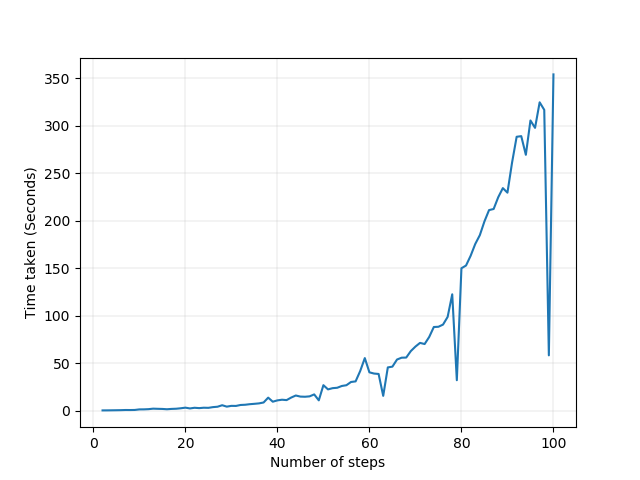

Text(0, 0.5, 'Time taken (Seconds)')

In [21]:
#Plot of n against time taken 
#Maybe do a 3D plot?
plt.plot(n_values, results['Time'])
plt.grid(linewidth=0.2)
plt.xlabel('Number of steps')
plt.ylabel('Time taken (Seconds)')

<IPython.core.display.Javascript object>


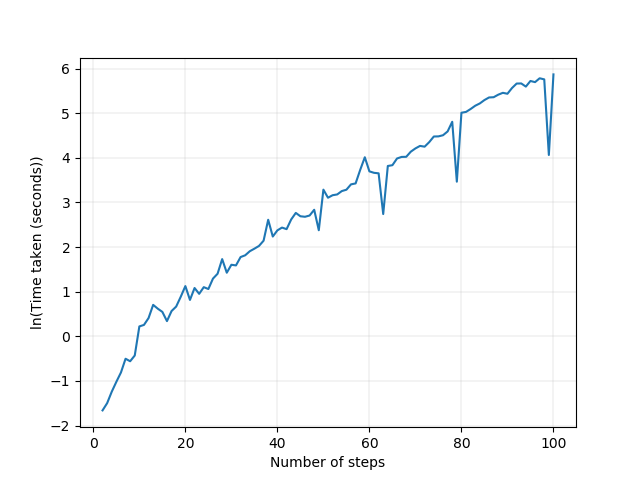

In [23]:
#Testing for an exponential relationship
plt.plot(n_values, np.log(results['Time']))
plt.xlabel('Number of steps')
plt.ylabel('ln(Time taken (seconds))')
plt.grid(linewidth=0.2)

<IPython.core.display.Javascript object>


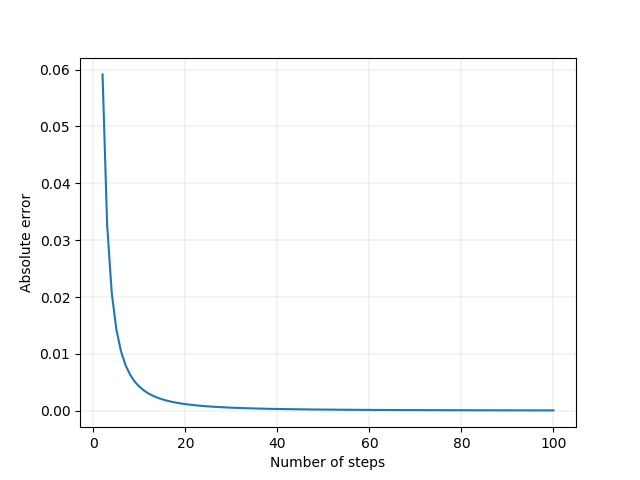

Text(0, 0.5, 'Absolute error')

In [24]:
#Improvement in the estimation as n increases 
error=np.abs(results['Result']-exact_value)
plt.plot(n_values, error)
plt.grid(linewidth=0.2)
plt.xlabel('Number of steps')
plt.ylabel('Absolute error')

In [13]:
#Diagram
#Define a function that returns the approximate value of the functional
def approximate_functional_plot(x0,x1,y0,y1,n):
    tick=time.time() #Start timing

    dx=(x1-x0)/(n+1)     #Spacing based on the x distances and number of regions selected
    y_values=np.zeros(n+2)
    y_values[0]=y0
    y_values[-1]=y1      #Boundary conditions

    #Generate all the needed yi variables in the expression for F
    i=sym.symbols('i')
    y=sym.symbols('y', cls=sym.Function)    #Define y as an unknown function
    F0=((y(i+1)-y(i))/dx)**2+((y(i+1)+y(i))/2)**2
    F0=np.asarray([F0.subs(i,j) for j in range(1,n)])

    #Need to collapse into one input rather than a list
    F=0
    for ii in range(n-1):
        F+=F0[ii]

    #Now also include the known boundary terms 
    F+=((y(1)-y_values[0])/dx)**2+((y(1)+y_values[0])/2)**2
    F+=((y_values[-1] -y(n))/dx)**2+((y_values[-1] +y(n))/2)**2

    #Define the approximate functional
    I=F*dx 

    #Now differentiate the form of the functional for each y(i) and store the value of y(i) that minimises the functional
    #List to hold each equation after differentiation via each y 
    I_prime=[]
    ys=[]

    for ii in range(1, n+1):
        #Differentiate wrt to each yi
        current=sym.diff(I, y(ii))
        I_prime.append(current)     #Append each new equation to the list
        ys.append(y(ii))        #Keep track of the y variables used for solving later


    #Now solve each equation simultaneously 
    solutions=sym.solve(tuple(I_prime), tuple(ys))

    #Isolate the y values
    for ii in range(1, n+1):
        y_values[ii]=solutions[y(ii)]

    return y_values

def x_values(x0,x1,n):
    return np.linspace(x0,x1,n+2)

#Analytic y
y_expression=(2-sym.exp(-2))*sym.sinh(x)/sym.sinh(2) + sym.exp(-x)
#Lamdify for numerical evaluation
y_expression=sym.lambdify(x,y_expression)
x_analytic=np.linspace(x0, x1, 1000)
y_analytic=y_expression(x_analytic)

<IPython.core.display.Javascript object>


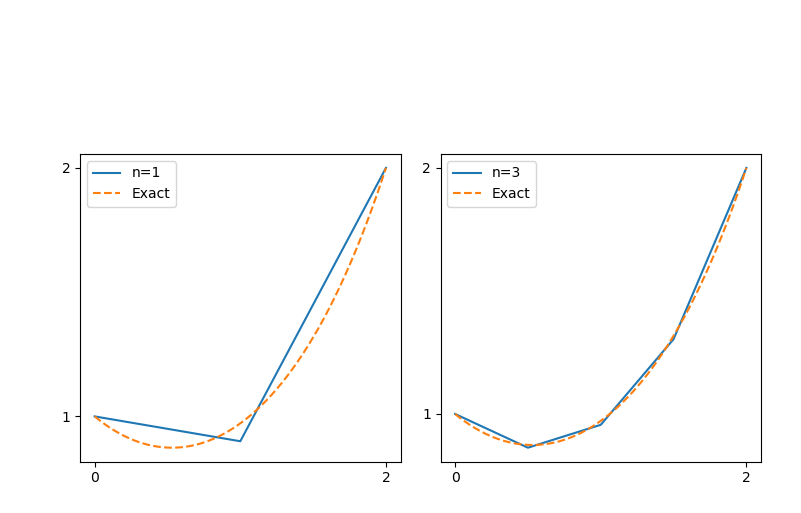

In [19]:
n1=1
n2=3

fig = plt.figure()
ax1=fig.add_axes([0.1,0.1,0.4,0.6], xticks=(0,2), yticks=(1,2), label='n=1')
ax2=fig.add_axes([0.55,0.1,0.4,0.6], xticks=(0,2), yticks=(1,2), label='n=3')

ax1.plot(x_values(x0,x1,n1), approximate_functional_plot(x0,x1,y0,y1,n1), label='n=1', linewidth=1.5)
ax2.plot(x_values(x0,x1,n2), approximate_functional_plot(x0,x1,y0,y1,n2), label='n=3', linewidth=1.5)
ax1.plot(x_analytic, y_analytic, linestyle='--', label='Exact')
ax1.legend()
ax2.plot(x_analytic, y_analytic, linestyle='--', label='Exact')
ax2.legend()